In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
train = pd.read_csv("train_cleaned.csv", encoding="ANSI")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,keyword,location,text,target,text_clean,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,filtered_lemma_str,combined_str
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,"['Our', 'Deeds', 'are', 'the', 'Reason', 'of',...","['our', 'deeds', 'are', 'the', 'reason', 'of',...","['deeds', 'reason', '#earthquake', 'may', 'all...","[('deeds', 'NNS'), ('reason', 'NN'), ('#earthq...","[('deeds', 'n'), ('reason', 'n'), ('#earthquak...","['deed', 'reason', '#earthquake', 'may', 'alla...",deed reason #earthquake may allah forgive u,deed reason #earthquake may allah forgive,deed reason #earthquake may allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"['Forest', 'fire', 'near', 'La', 'Ronge', 'Sas...","['forest', 'fire', 'near', 'la', 'ronge', 'sas...","['forest', 'fire', 'near', 'la', 'ronge', 'sas...","[('forest', 'JJS'), ('fire', 'NN'), ('near', '...","[('forest', 'a'), ('fire', 'n'), ('near', 'n')...","['forest', 'fire', 'near', 'la', 'ronge', 'sas...",forest fire near la ronge sask canada,forest fire near ronge sask canada,forest fire near ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"['All', 'residents', 'asked', 'to', 'shelter',...","['all', 'residents', 'asked', 'to', 'shelter',...","['residents', 'asked', 'shelter', 'place', 'no...","[('residents', 'NNS'), ('asked', 'VBD'), ('she...","[('residents', 'n'), ('asked', 'v'), ('shelter...","['resident', 'ask', 'shelter', 'place', 'notif...",resident ask shelter place notify officer evac...,resident ask shelter place notify officer evac...,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive #wildfires evacuation ord...,"['13000', 'people', 'receive', '#wildfires', '...","['13000', 'people', 'receive', '#wildfires', '...","['13000', 'people', 'receive', '#wildfires', '...","[('13000', 'CD'), ('people', 'NNS'), ('receive...","[('13000', 'n'), ('people', 'n'), ('receive', ...","['13000', 'people', 'receive', '#wildfires', '...",13000 people receive #wildfires evacuation ord...,13000 people receive #wildfires evacuation ord...,13000 people receive #wildfires evacuation ord...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,"['Just', 'got', 'sent', 'this', 'photo', 'from...","['just', 'got', 'sent', 'this', 'photo', 'from...","['got', 'sent', 'photo', 'ruby', '#alaska', 's...","[('got', 'VBD'), ('sent', 'JJ'), ('photo', 'NN...","[('got', 'v'), ('sent', 'a'), ('photo', 'n'), ...","['get', 'sent', 'photo', 'ruby', '#alaska', 's...",get sent photo ruby #alaska smoke #wildfires p...,get sent photo ruby #alaska smoke #wildfires p...,get sent photo ruby #alaska smoke #wildfires p...


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train.shape, test.shape

((7613, 15), (3263, 4))

## Keyword, Location

#### Missing value

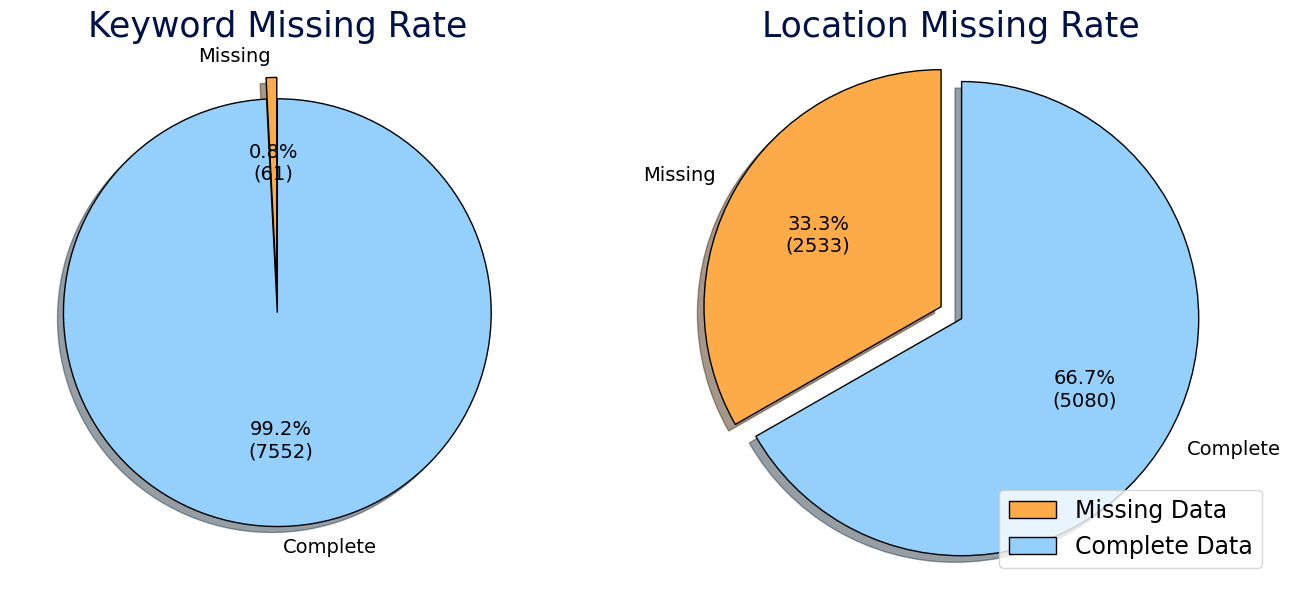

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn xkcd 색상 불러오기
xkcd_colors = sns.xkcd_rgb

# 결측치 및 비결측치 수 계산
missing_keyword_count = train.keyword.isna().sum()
complete_keyword_count = len(train) - missing_keyword_count

missing_location_count = train.location.isna().sum()
complete_location_count = len(train) - missing_location_count

# 퍼센트 비율 계산
missing_keyword_rate = missing_keyword_count / len(train) * 100
complete_keyword_rate = 100 - missing_keyword_rate

missing_location_rate = missing_location_count / len(train) * 100
complete_location_rate = 100 - missing_location_rate

# 파이 차트를 그릴 데이터 준비
keyword_labels = ['Missing', 'Complete']
keyword_sizes = [missing_keyword_rate, complete_keyword_rate]
keyword_counts = [missing_keyword_count, complete_keyword_count]

location_labels = ['Missing', 'Complete']
location_sizes = [missing_location_rate, complete_location_rate]
location_counts = [missing_location_count, complete_location_count]

# 사용자 정의 함수: 퍼센트 + 항목의 실제 샘플 수를 괄호로 표시
def make_autopct(counts):
    def my_autopct(pct):
        count = counts[int(pct > (100 - pct))]  # pct 기준으로 샘플 수 선택
        return f'{pct:.1f}%\n({count})'  # 퍼센트와 샘플 수를 함께 표시
    return my_autopct

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 밝은 색상 중 대비되는 색상 선택
main_color = xkcd_colors['navy blue']
highlight_color = xkcd_colors['light orange']  # 결측치: 밝은 주황색
secondary_color = xkcd_colors['light blue']    # 완성 데이터: 밝은 파란색
colors = [highlight_color, secondary_color]

# keyword 결측치 비율 파이 차트
ax[0].pie(keyword_sizes, labels=keyword_labels, autopct=make_autopct(keyword_counts),
          colors=colors, startangle=90, shadow=True, explode=(0.1, 0), textprops={'fontsize': 14}, # 그림자 효과 추가
          wedgeprops={'edgecolor': 'black'})  # 경계선 설정
ax[0].set_title('Keyword Missing Rate', color=main_color, fontsize=25)

# location 결측치 비율 파이 차트
ax[1].pie(location_sizes, labels=location_labels, autopct=make_autopct(location_counts),
          colors=colors, startangle=90, shadow=True, explode=(0.1, 0), textprops={'fontsize': 14}, # 그림자 효과 추가
          wedgeprops={'edgecolor': 'black'})
ax[1].set_title('Location Missing Rate', color=main_color, fontsize=25)

# 범례 추가
plt.legend(labels=['Missing Data', 'Complete Data'], loc='lower right', fontsize=17)

# 파이 차트를 동그랗게 표시
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Unique values

In [7]:
print(len(train.keyword.unique()), len(train.location.unique()))

222 3342


#### Target Frequency

C:\Users\jongcheol\AppData\Local\Temp\ipykernel_14836\1251589634.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_label', data=train, palette=['#66c2a5', '#fc8d62'])


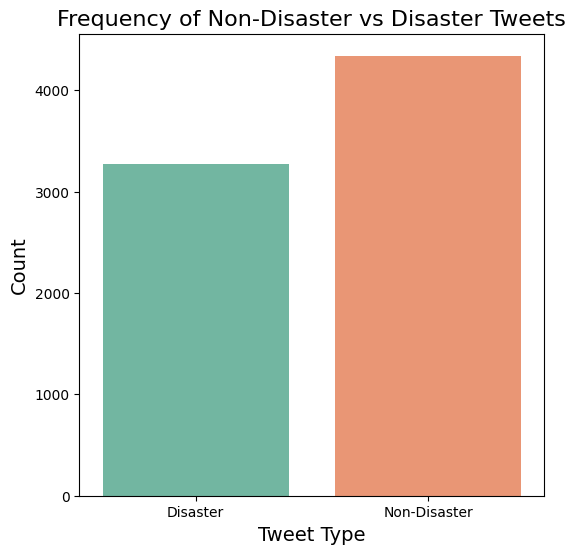

In [8]:
# target 값의 레이블을 Non-Disaster와 Disaster로 변환
train['target_label'] = train['target'].map({0: 'Non-Disaster', 1: 'Disaster'})

# target 값의 빈도 막대그래프
plt.figure(figsize=(6, 6))
sns.countplot(x='target_label', data=train, palette=['#66c2a5', '#fc8d62'])

# 그래프 제목 및 레이블 설정
plt.title('Frequency of Non-Disaster vs Disaster Tweets', fontsize=16)
plt.xlabel('Tweet Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 그래프 출력
plt.show()

train.drop('target_label', inplace=True, axis=1)

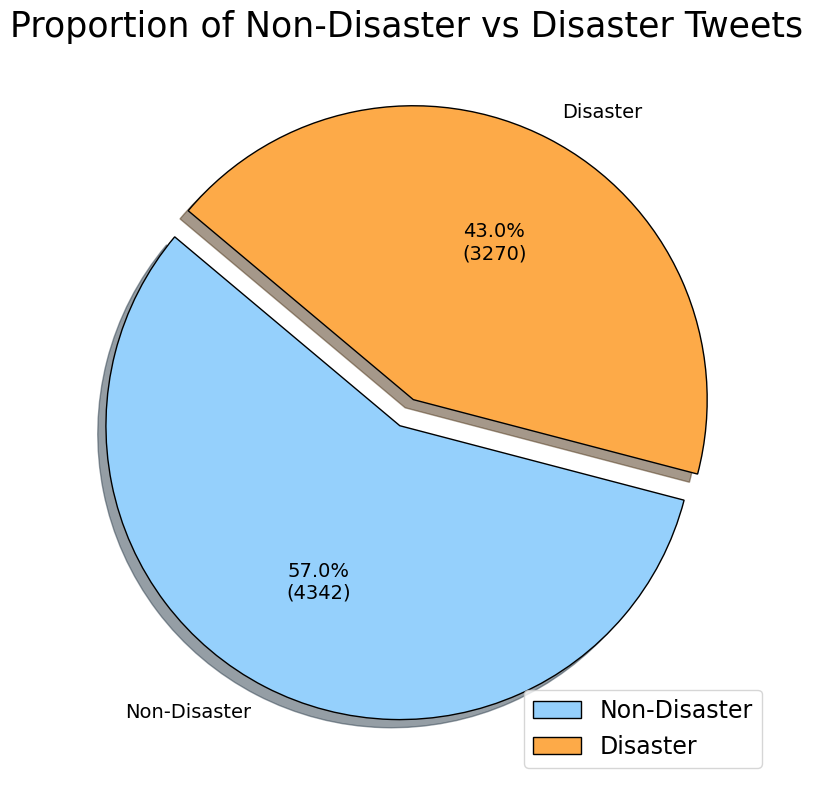

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn xkcd 색상 불러오기
xkcd_colors = sns.xkcd_rgb

# target 값의 레이블을 Non-Disaster와 Disaster로 변환
train['target_label'] = train['target'].map({0: 'Non-Disaster', 1: 'Disaster'})

# target 값의 비율 및 샘플 수 계산
target_counts = train['target_label'].value_counts()
target_labels = target_counts.index
target_sizes = target_counts.values

# 사용자 정의 함수: 퍼센트와 샘플 수를 함께 표시
def make_autopct(counts):
    def my_autopct(pct):
        total = sum(counts)
        count = int(pct * total / 100.0)  # 해당 항목의 샘플 수 계산
        return f'{pct:.1f}%\n({count})'  # 퍼센트와 샘플 수를 함께 표시
    return my_autopct

# target 값의 비율 파이 차트
fig, ax = plt.subplots(figsize=(8, 8))

# xkcd 색상 사용 (이전과 동일한 색상 적용)
colors = [xkcd_colors['light blue'], xkcd_colors['light orange']]

# 파이 차트 그리기
ax.pie(
    target_sizes,
    labels=target_labels,
    autopct=make_autopct(target_sizes),  # 퍼센트와 샘플 수 표시
    startangle=140,  # 시작 각도 설정
    colors=colors,  # 색상 설정 (밝은 주황색과 밝은 파란색)
    explode=[0.05, 0.05],  # 각 섹션을 약간 분리
    shadow=True,  # 그림자 효과 추가
    wedgeprops={'edgecolor': 'black'},  # 경계선 설정
    textprops={'fontsize': 14}  # 라벨 및 퍼센트 글씨 크기 확대
)

# 파이 차트 제목 및 설정
ax.set_title('Proportion of Non-Disaster vs Disaster Tweets', fontsize=25)  # 제목 글씨 크기 확대
ax.set_ylabel('')  # y축 라벨 제거

# 범례 추가
ax.legend(labels=['Non-Disaster', 'Disaster'], loc='lower right', fontsize=17)  # 범례 글씨 크기 확대

# 그래프 출력
plt.tight_layout()
plt.show()

# 임시 열 삭제
train.drop('target_label', inplace=True, axis=1)


#### Target distribution in keywords

In [10]:
train.groupby('keyword')['target'].mean()

keyword
ablaze                 0.361111
accident               0.685714
aftershock             0.000000
airplane%20accident    0.857143
ambulance              0.526316
                         ...   
wounded                0.702703
wounds                 0.303030
wreck                  0.189189
wreckage               1.000000
wrecked                0.076923
Name: target, Length: 221, dtype: float64

In [11]:
train['target_mean'] = train.groupby('keyword')['target'].transform('mean')

* transform()을 이용하면 원래 데이터프레임과 동일한 크기 맞추기 위해, 그룹별로 계산된 값을 해당 행에 맞게 매핑해준다.

In [12]:
train.sort_values(by='target_mean', ascending=False)['target']

2439    1
2178    1
2458    1
2459    1
2460    1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [13]:
train.location[~train.location.isna()]

31                         Birmingham
32      Est. September 2012 - Bristol
33                             AFRICA
34                   Philadelphia, PA
35                         London, UK
                    ...              
7575                               TN
7577           #NewcastleuponTyne #UK
7579                Vancouver, Canada
7580                          London 
7581                          Lincoln
Name: location, Length: 5080, dtype: object

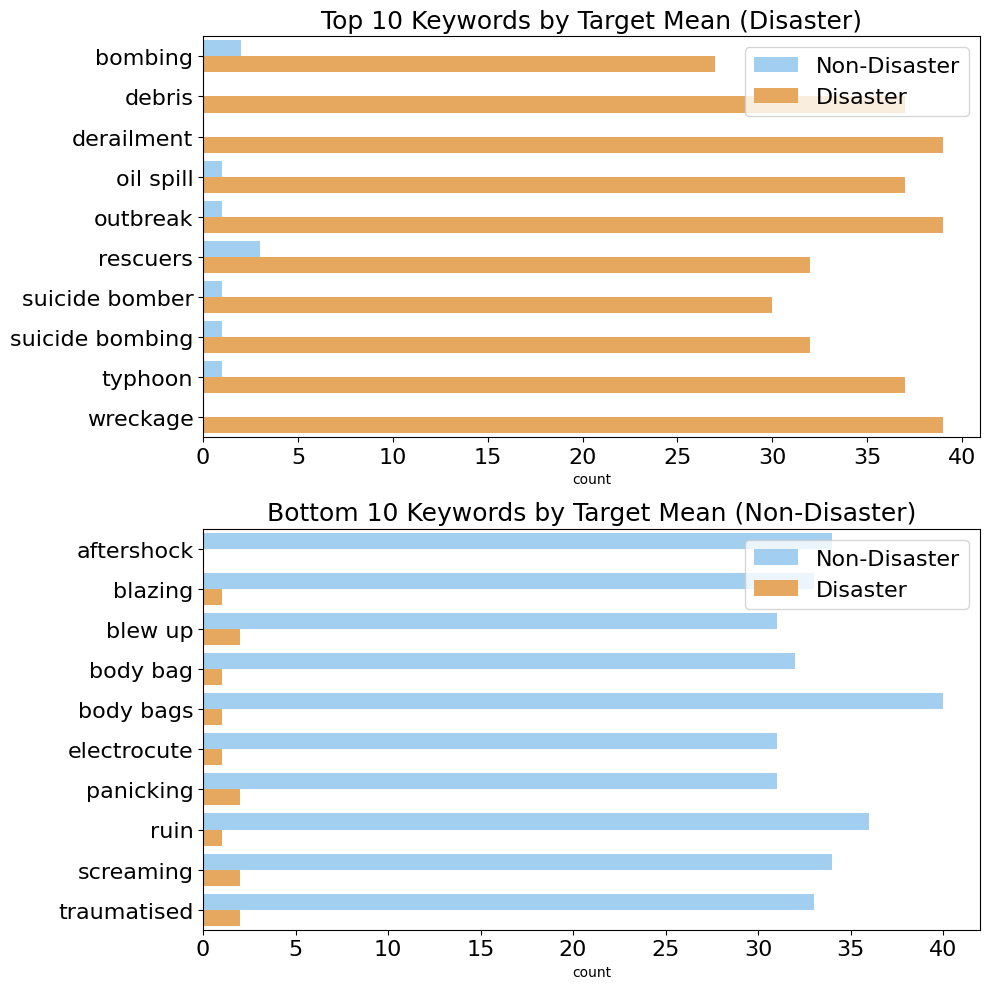

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn xkcd 색상 불러오기
xkcd_colors = sns.xkcd_rgb

# 1. keyword에서 %20을 공백으로 대체
train['keyword'] = train['keyword'].str.replace('%20', ' ')

# 2. target_mean을 기준으로 상위 15개, 하위 15개의 키워드를 추출
train['target_mean'] = train.groupby('keyword')['target'].transform('mean')

# 상위 15개, 하위 15개 키워드 선택
top_15_keywords = train[['keyword', 'target_mean']].drop_duplicates().sort_values(by='target_mean', ascending=False).head(10)['keyword']
bottom_15_keywords = train[['keyword', 'target_mean']].drop_duplicates().sort_values(by='target_mean', ascending=True).head(10)['keyword']

# 3. 상위 15개, 하위 15개의 키워드를 기준으로 데이터를 나눠서 시각화
fig, axes = plt.subplots(nrows=2, figsize=(10, 10), dpi=100)  # 그래프 크기를 줄임

# 색상 지정
colors = [xkcd_colors['light blue'], xkcd_colors['light orange']]

# 상위 15개 키워드에 대한 그래프
sns.countplot(y=train[train['keyword'].isin(top_15_keywords)].sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train[train['keyword'].isin(top_15_keywords)]['target'],
              ax=axes[0], palette=colors)  # 막대 색상 적용
axes[0].set_title('Top 10 Keywords by Target Mean (Disaster)', fontsize=18)  # 제목 글씨 크기 증가
axes[0].tick_params(axis='x', labelsize=16)  # x축 글씨 크기
axes[0].tick_params(axis='y', labelsize=16)  # y축 글씨 크기

# 하위 15개 키워드에 대한 그래프
sns.countplot(y=train[train['keyword'].isin(bottom_15_keywords)].sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train[train['keyword'].isin(bottom_15_keywords)]['target'],
              ax=axes[1], palette=colors)  # 막대 색상 적용
axes[1].set_title('Bottom 10 Keywords by Target Mean (Non-Disaster)', fontsize=18)  # 제목 글씨 크기 증가
axes[1].tick_params(axis='x', labelsize=16)  # x축 글씨 크기
axes[1].tick_params(axis='y', labelsize=16)  # y축 글씨 크기

# 4. 범례 추가 (0은 Non-Disaster, 1은 Disaster로 매핑)
for ax in axes:
    ax.legend(['Non-Disaster', 'Disaster'], loc=1, fontsize=16)  # 범례 글씨 크기

# 5. 불필요한 y축 레이블 제거 (이전 설명과 동일하기 때문에 필요 없음)
for ax in axes:
    ax.set_ylabel('')

# 그래프 출력
plt.tight_layout()
plt.show()

# 임시 열 삭제
train.drop(columns=['target_mean'], inplace=True)



#### Unigrams

In [15]:
from collections import defaultdict

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '']
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 7

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in train[train.target==1]['filtered_lemma_str']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in train[train.target==0]['filtered_lemma_str']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

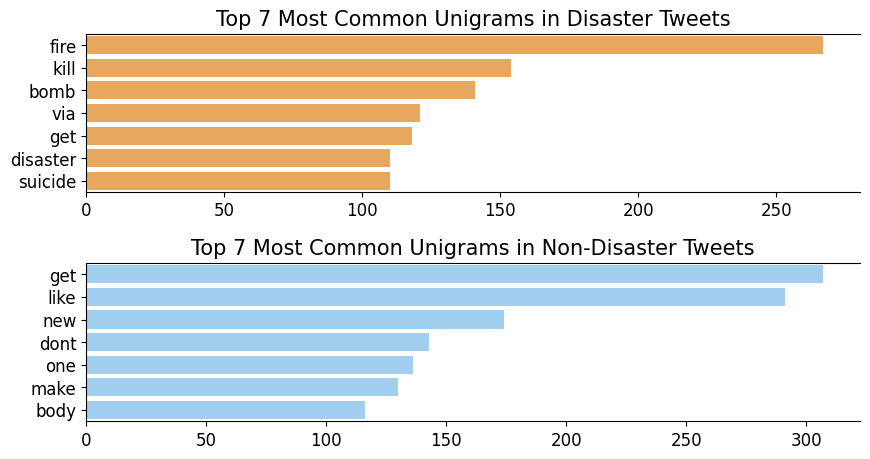

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn xkcd 색상 불러오기
xkcd_colors = sns.xkcd_rgb

# 막대 색상 설정
nondisaster_color = xkcd_colors['light blue']
disaster_color = xkcd_colors['light orange']

# 그래프 생성
fig, axes = plt.subplots(nrows=2, figsize=(9, 5), dpi=100)

# 레이아웃 조정
plt.tight_layout(pad=3.0)

# Disaster와 Non-disaster의 각각 상위 N개의 유니그램을 시각화
sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color=disaster_color)
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color=nondisaster_color)

# 각 그래프의 세부 설정
for i in range(2):
    # 오른쪽 테두리 제거
    axes[i].spines['right'].set_visible(False)
    # x, y축 라벨 제거
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    # 눈금 크기 조정
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# 그래프 제목 설정
axes[0].set_title(f'Top {N} Most Common Unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} Most Common Unigrams in Non-Disaster Tweets', fontsize=15)

# 그래프 출력
plt.show()


#### Bigrams

In [17]:
# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in train[train.target==1]['filtered_lemma_str']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in train[train.target==0]['filtered_lemma_str']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

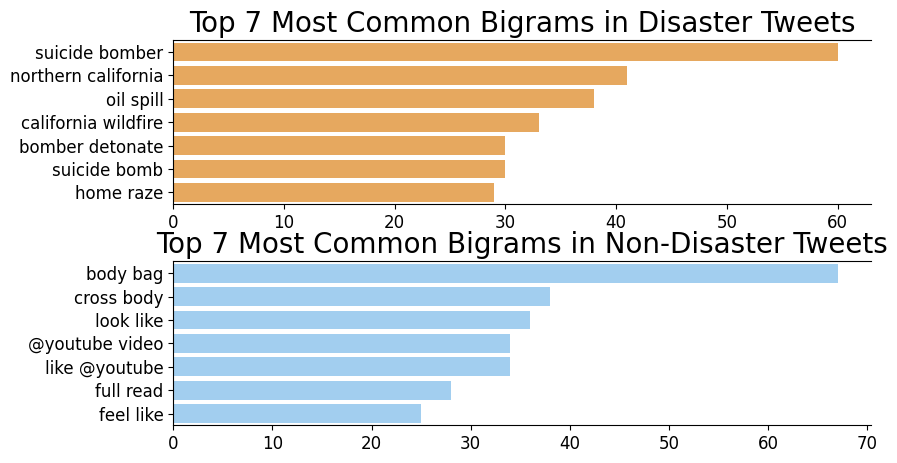

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn xkcd 색상 불러오기
xkcd_colors = sns.xkcd_rgb

# 막대 색상 설정
nondisaster_color = xkcd_colors['light blue']
disaster_color = xkcd_colors['light orange']

# 그래프 생성
fig, axes = plt.subplots(nrows=2, figsize=(9, 5), dpi=100)

# 그래프 간격 조정 (wspace로 간격 설정)
plt.subplots_adjust(hspace=0.35)

# Disaster와 Non-disaster의 각각 상위 N개의 바이그램을 시각화
sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color=disaster_color)
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color=nondisaster_color)

# 각 그래프의 세부 설정
for i in range(2):
    # 오른쪽 테두리 제거
    axes[i].spines['right'].set_visible(False)
    # x, y축 라벨 제거
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    # 눈금 크기 조정
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# 그래프 제목 설정
axes[0].set_title(f'Top {N} Most Common Bigrams in Disaster Tweets', fontsize=20)
axes[1].set_title(f'Top {N} Most Common Bigrams in Non-Disaster Tweets', fontsize=20)

# 그래프 출력
plt.show()


#### 글자 수 및 단어의 수 분포

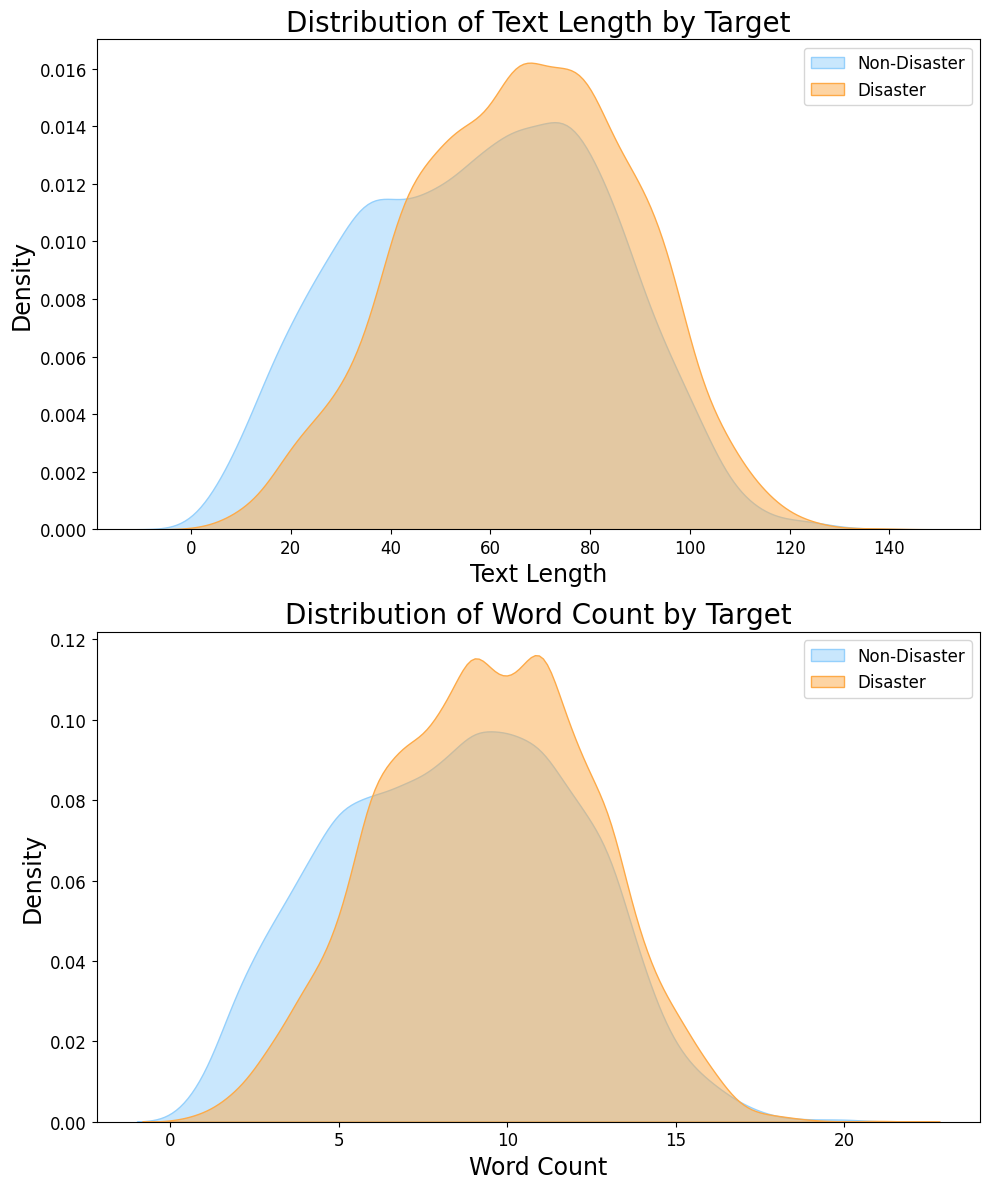

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn xkcd 색상 불러오기
xkcd_colors = sns.xkcd_rgb
target_0_color = xkcd_colors['light blue']
target_1_color = xkcd_colors['light orange']

# 텍스트의 글자 수와 단어 수 계산
train['text_length'] = train['filtered_lemma_str'].apply(len)
train['word_count'] = train['filtered_lemma_str'].apply(lambda x: len(x.split()))

# 서브플롯 설정: 2행 1열로 그래프 세로로 배치, 가로:세로 비율 2:3
fig, axs = plt.subplots(2, 1, figsize=(10, 12), dpi=100)

# 첫 번째 그래프: 글자 수 분포
sns.kdeplot(train[train['target'] == 0]['text_length'], label='Non-Disaster', fill=True, alpha=0.5, ax=axs[0], color=target_0_color)
sns.kdeplot(train[train['target'] == 1]['text_length'], label='Disaster', fill=True, alpha=0.5, ax=axs[0], color=target_1_color)
axs[0].set_title('Distribution of Text Length by Target', fontsize=20)
axs[0].set_xlabel('Text Length', fontsize=17)
axs[0].set_ylabel('Density', fontsize=17)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].legend(fontsize=12)

# 그래프 간격 조정 (wspace로 간격 설정)
plt.subplots_adjust(hspace=0.5)

# 두 번째 그래프: 단어 수 분포
sns.kdeplot(train[train['target'] == 0]['word_count'], label='Non-Disaster', fill=True, alpha=0.5, ax=axs[1], color=target_0_color)
sns.kdeplot(train[train['target'] == 1]['word_count'], label='Disaster', fill=True, alpha=0.5, ax=axs[1], color=target_1_color)
axs[1].set_title('Distribution of Word Count by Target', fontsize=20)
axs[1].set_xlabel('Word Count', fontsize=17)
axs[1].set_ylabel('Density', fontsize=17)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].legend(fontsize=12)

# 그래프 출력 및 레이아웃 조정
plt.tight_layout()
plt.show()
